In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

In [2]:
data_url='https://raw.githubusercontent.com/vengie/student_performance/main/exams.csv'
data = pd.read_csv(data_url)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [3]:
col = data.loc[: , "math score":"writing score"]

In [4]:
col

,math score,reading score,writing score
0,67,67,63
1,40,59,55
2,59,60,50
3,77,78,68
4,78,73,68
...,...,...,...
995,73,70,65
996,85,91,92
997,32,35,41
998,73,74,82


In [5]:
data['overall success'] = col.mean(axis=1)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall success
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000
...,...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65,69.333333
996,male,group D,associate's degree,free/reduced,completed,85,91,92,89.333333
997,female,group C,some high school,free/reduced,none,32,35,41,36.000000
998,female,group C,some college,standard,none,73,74,82,76.333333


In [6]:
data = data.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parent_education',
    'test preparation course': 'test_preparation_course',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score',
    'overall success':'overall_success',
})
data.head()

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_success
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


In [7]:
from sklearn import preprocessing
lb=preprocessing.LabelEncoder()

data["gender_1"]=lb.fit_transform(data["gender"])
data["race_ethnicity_1"]=lb.fit_transform(data["race_ethnicity"])
data["test_preparation_course_1"]=lb.fit_transform(data["test_preparation_course"])
data["lunch_1"]=lb.fit_transform(data["lunch"])
data["parent_education_1"]=lb.fit_transform(data["parent_education"])

In [8]:
data.head()

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,overall_success,gender_1,race_ethnicity_1,test_preparation_course_1,lunch_1,parent_education_1
0,male,group A,high school,standard,completed,67,67,63,65.666667,1,0,0,1,2
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333,0,3,1,0,5
2,male,group E,some college,free/reduced,none,59,60,50,56.333333,1,4,1,0,4
3,male,group B,high school,standard,none,77,78,68,74.333333,1,1,1,1,2
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000,1,4,0,1,0


In [9]:
df=data.drop(["gender","race_ethnicity","test_preparation_course","lunch","parent_education"],axis=1)
df.head()

,math_score,reading_score,writing_score,overall_success,gender_1,race_ethnicity_1,test_preparation_course_1,lunch_1,parent_education_1
0,67,67,63,65.666667,1,0,0,1,2
1,40,59,55,51.333333,0,3,1,0,5
2,59,60,50,56.333333,1,4,1,0,4
3,77,78,68,74.333333,1,1,1,1,2
4,78,73,68,73.000000,1,4,0,1,0


In [10]:
y = df["overall_success"]
X = df.drop(['overall_success'], axis=1)

In [11]:
y

0      65.666667
1      51.333333
2      56.333333
3      74.333333
4      73.000000
         ...    
995    69.333333
996    89.333333
997    36.000000
998    76.333333
999    62.333333
Name: overall_success, Length: 1000, dtype: float64

In [12]:
X = df.drop(['race_ethnicity_1', 'lunch_1', 'parent_education_1', 'overall_success'], axis=1)
X.head()

,math_score,reading_score,writing_score,gender_1,test_preparation_course_1
0,67,67,63,1,0
1,40,59,55,0,1
2,59,60,50,1,1
3,77,78,68,1,1
4,78,73,68,1,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# from sklearn.linear_model import LinearRegression

# regressor = LinearRegression()
# regressor.fit(X_train_scaled, y_train)

In [16]:
# y_pred_1 = regressor.predict(X_test_scaled)
# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
# df

In [17]:
# from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_1))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_1))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))

In [18]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor(max_depth=5)
dec_reg
dec_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5)

In [19]:
y_pred_dec_reg=dec_reg.predict(X_test_scaled)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dec_reg})
df

,Actual,Predicted
521,76.666667,77.714286
737,82.000000,83.615385
740,52.000000,54.523810
660,92.000000,87.259887
411,69.666667,70.519481
...,...,...
408,48.000000,50.736111
332,51.000000,50.736111
208,82.333333,82.333333
613,81.000000,81.240741


# Neural Network Architecture

In [20]:
#Import packages
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
model = Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(2670, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 2670)              16020     
                                                                 
 dense_2 (Dense)             (None, 1)                 2671      
                                                                 
Total params: 18,721
Trainable params: 18,721
Non-trainable params: 0
_________________________________________________________________


# Comple Model

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

Epoch 1/10
27/27 [==============================] - 0s 11ms/step - loss: 13.0190 - mean_absolute_error: 2.9185 - val_loss: 12.3013 - val_mean_absolute_error: 2.7202
Epoch 2/10
27/27 [==============================] - 0s 8ms/step - loss: 12.3656 - mean_absolute_error: 2.8400 - val_loss: 11.8789 - val_mean_absolute_error: 2.6749
Epoch 3/10
27/27 [==============================] - 0s 7ms/step - loss: 11.8272 - mean_absolute_error: 2.7732 - val_loss: 11.5257 - val_mean_absolute_error: 2.6406
Epoch 4/10
27/27 [==============================] - 0s 9ms/step - loss: 11.2346 - mean_absolute_error: 2.6886 - val_loss: 10.5702 - val_mean_absolute_error: 2.5236
Epoch 5/10
27/27 [==============================] - 0s 12ms/step - loss: 10.8084 - mean_absolute_error: 2.6473 - val_loss: 10.0643 - val_mean_absolute_error: 2.4639
Epoch 6/10
27/27 [==============================] - 0s 12ms/step - loss: 10.1807 - mean_absolute_error: 2.5611 - val_loss: 9.7769 - val_mean_absolute_error: 2.4251
Epoch 7/10
27/

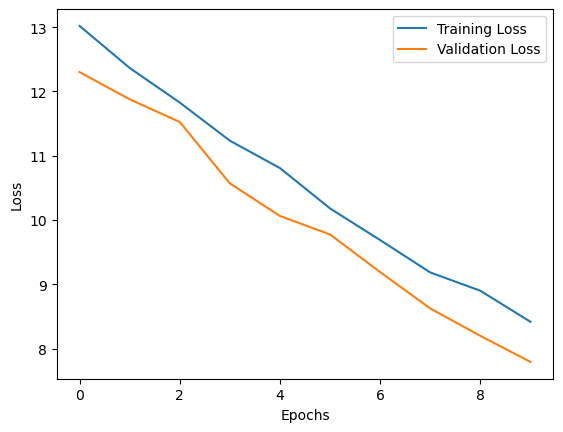

In [24]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, batch_size=30, validation_data=(X_test, y_test))

# Plot the training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Model Evaluation on the Test set**

In [25]:
predictions1 = model.predict(X_test)
predictions1

7/7 [==============================] - 0s 5ms/step


array([[80.98736 ],
       [81.02681 ],
       [53.612907],
       [89.59494 ],
       [72.90808 ],
       [71.013565],
       [95.73192 ],
       [81.28509 ],
       [80.138626],
       [78.46383 ],
       [62.295467],
       [61.39405 ],
       [56.979244],
       [69.41944 ],
       [34.97782 ],
       [31.882534],
       [80.01162 ],
       [77.52976 ],
       [76.23233 ],
       [81.95293 ],
       [55.005077],
       [72.6401  ],
       [71.777695],
       [91.3308  ],
       [67.64412 ],
       [88.90408 ],
       [77.87463 ],
       [80.736595],
       [70.31934 ],
       [64.20815 ],
       [80.59384 ],
       [68.12347 ],
       [49.786465],
       [81.69434 ],
       [73.03894 ],
       [64.62985 ],
       [69.53679 ],
       [84.44315 ],
       [67.87125 ],
       [50.865345],
       [60.25855 ],
       [96.89819 ],
       [47.689148],
       [58.398575],
       [43.357662],
       [75.73203 ],
       [65.275635],
       [72.00481 ],
       [66.47908 ],
       [67.247734],


**Model Evaluation Metrics**

In [26]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

Mean Absolute Error: 2.1709023666381837
Mean Squared Error: 7.79471941252325
Root Mean Squared Error: 2.791902471886017


**Model Improvement**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [28]:
model2 = Sequential()
model2.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
model2.add(BatchNormalization())  # Add batch normalization layer
model2.add(Dense(2670, activation='relu'))
model2.add(BatchNormalization())  # Add batch normalization layer
# model2.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
model2.add(Dense(1, activation='linear'))

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 batch_normalization (BatchN  (None, 5)                20        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 2670)              16020     
                                                                 
 batch_normalization_1 (Batc  (None, 2670)             10680     
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 2671      
                                                                 
Total params: 29,421
Trainable params: 24,071
Non-trai

In [30]:
model2.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

Epoch 1/100
13/13 [==============================] - 3s 39ms/step - loss: 4575.7197 - mean_absolute_error: 67.2488 - val_loss: 4092.9141 - val_mean_absolute_error: 62.4701
Epoch 2/100
13/13 [==============================] - 0s 14ms/step - loss: 4409.3384 - mean_absolute_error: 66.3049 - val_loss: 4140.7231 - val_mean_absolute_error: 62.8004
Epoch 3/100
13/13 [==============================] - 0s 14ms/step - loss: 4197.9609 - mean_absolute_error: 64.7382 - val_loss: 3806.3022 - val_mean_absolute_error: 60.1451
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 3853.5840 - mean_absolute_error: 61.9707 - val_loss: 3391.5247 - val_mean_absolute_error: 56.6213
Epoch 5/100
13/13 [==============================] - 0s 16ms/step - loss: 3324.6516 - mean_absolute_error: 57.5784 - val_loss: 2903.7610 - val_mean_absolute_error: 52.0891
Epoch 6/100
13/13 [==============================] - 0s 16ms/step - loss: 2649.7949 - mean_absolute_error: 51.3405 - val_loss: 2238.7800 - v

Epoch 50/100
13/13 [==============================] - 0s 28ms/step - loss: 8.8049 - mean_absolute_error: 2.3459 - val_loss: 45.6645 - val_mean_absolute_error: 5.4973
Epoch 51/100
13/13 [==============================] - 0s 26ms/step - loss: 3.4502 - mean_absolute_error: 1.4730 - val_loss: 33.2472 - val_mean_absolute_error: 4.5849
Epoch 52/100
13/13 [==============================] - 0s 21ms/step - loss: 4.0442 - mean_absolute_error: 1.6809 - val_loss: 44.4768 - val_mean_absolute_error: 5.3828
Epoch 53/100
13/13 [==============================] - 0s 22ms/step - loss: 6.3965 - mean_absolute_error: 2.0542 - val_loss: 22.3680 - val_mean_absolute_error: 3.4948
Epoch 54/100
13/13 [==============================] - 0s 22ms/step - loss: 5.2617 - mean_absolute_error: 1.6732 - val_loss: 17.5413 - val_mean_absolute_error: 3.1200
Epoch 55/100
13/13 [==============================] - 0s 21ms/step - loss: 5.5366 - mean_absolute_error: 1.9486 - val_loss: 16.4447 - val_mean_absolute_error: 2.8198
Epoc

13/13 [==============================] - 0s 27ms/step - loss: 6.3288 - mean_absolute_error: 2.0739 - val_loss: 15.2568 - val_mean_absolute_error: 3.8406
Epoch 100/100
13/13 [==============================] - 0s 23ms/step - loss: 2.2921 - mean_absolute_error: 1.1736 - val_loss: 13.8613 - val_mean_absolute_error: 3.6886


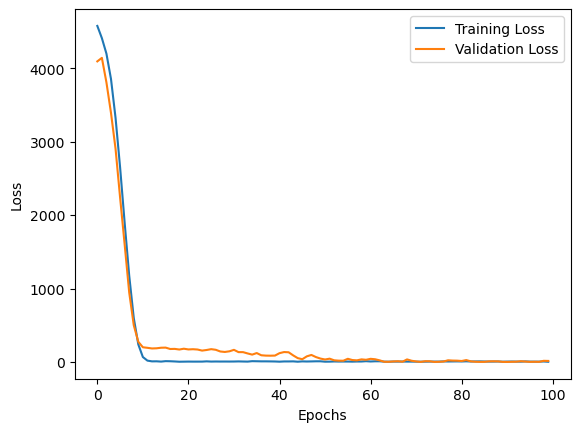

In [31]:
import matplotlib.pyplot as plt

history = model2.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Plot the training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Model Evaluation for the Improve Model on the Test set**

In [32]:
predictions2 = model2.predict(X_test)
predictions2

7/7 [==============================] - 0s 8ms/step


array([[72.644165],
       [78.908585],
       [47.80671 ],
       [89.10607 ],
       [66.046036],
       [64.23867 ],
       [95.38642 ],
       [76.2184  ],
       [75.83224 ],
       [73.439285],
       [54.850033],
       [52.10513 ],
       [54.324085],
       [68.46051 ],
       [32.577995],
       [30.191637],
       [78.95108 ],
       [72.625916],
       [70.41414 ],
       [79.29846 ],
       [48.449535],
       [72.92413 ],
       [67.29855 ],
       [89.85345 ],
       [61.95252 ],
       [90.6492  ],
       [74.08783 ],
       [76.56838 ],
       [69.75818 ],
       [54.513798],
       [78.452484],
       [61.379276],
       [41.191277],
       [81.67963 ],
       [73.81144 ],
       [57.778526],
       [69.11944 ],
       [87.8201  ],
       [62.79782 ],
       [51.68527 ],
       [54.787773],
       [95.69034 ],
       [42.89392 ],
       [54.484585],
       [38.898125],
       [72.02382 ],
       [59.413353],
       [68.402374],
       [62.236492],
       [62.91242 ],


**Model Evaluation of Metrics for Improved Model**

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

Mean Absolute Error: 3.6885489559173577
Mean Squared Error: 13.861261289775866
Root Mean Squared Error: 3.723071485987862
